In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2024-07-04 22:56:13.171844: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# import pandas as pd
# !python3 -m pip install pandas 
!python3 -c 'import pandas' 


/bin/bash: /home/kip/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, MaxPooling1D, Conv1D
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split

In [4]:
!head spam.csv

/bin/bash: /home/kip/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a val

In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns = ['labels','data']

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['b_labels'] = df['labels'].map({'ham': 0,'spam': 1})

In [11]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
Y = df['b_labels'].values

In [13]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [14]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [15]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('found %s unique tokens' % V)

found 7302 unique tokens


In [16]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor: ' ,data_train.shape)

Shape of data train tensor:  (3733, 162)


In [17]:
T = data_train.shape[1]

In [18]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data train tensor: ' ,data_test.shape)

Shape of data train tensor:  (1839, 162)


In [19]:
D = 20
M = 15

# First attempt
# i = Input(shape=(T,))
# x = Embedding(V+1,D)(i)
# x = Conv1D(32, 3, activation='relu')(x)
# x = Dense(1, activation='sigmoid')(x)

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 162)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 162, 20)           146060    
_________________________________________________________________
conv1d (Conv1D)              (None, 160, 32)           1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 53, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 51, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 17, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 128)           24704 

2024-07-04 22:56:16.385662: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-07-04 22:56:16.397835: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-07-04 22:56:16.635029: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-04 22:56:16.649817: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 with Max-Q Design computeCapability: 6.1
coreClock: 1.3415GHz coreCount: 10 deviceMemorySize: 3.00GiB deviceMemoryBandwidth: 178.99GiB/s
2024-07-04 22:56:16.649865: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-07-04 22:56:16.651218: I tensorflow/str

In [20]:
r = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test,Ytest)
    )

Epoch 1/10


2024-07-04 22:56:17.650075: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-07-04 22:56:17.650968: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2208005000 Hz
2024-07-04 22:56:18.119472: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-07-04 22:56:18.283340: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2024-07-04 22:56:18.920010: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2024-07-04 22:56:18.976190: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


117/117 [==============================] - 14s 70ms/step - loss: 0.4763 - accuracy: 0.8344 - val_loss: 0.2672 - val_accuracy: 0.8641
Epoch 2/10
117/117 [==============================] - 1s 12ms/step - loss: 0.1694 - accuracy: 0.9171 - val_loss: 0.0607 - val_accuracy: 0.9853
Epoch 3/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0203 - accuracy: 0.9955 - val_loss: 0.0664 - val_accuracy: 0.9880
Epoch 4/10
117/117 [==============================] - 1s 11ms/step - loss: 0.0040 - accuracy: 0.9998 - val_loss: 0.0505 - val_accuracy: 0.9897
Epoch 5/10
117/117 [==============================] - 1s 11ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.0560 - val_accuracy: 0.9908
Epoch 6/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0530 - val_accuracy: 0.9918
Epoch 7/10
117/117 [==============================] - 1s 12ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0582 - val_accuracy: 0.9902
Epoch 8/1

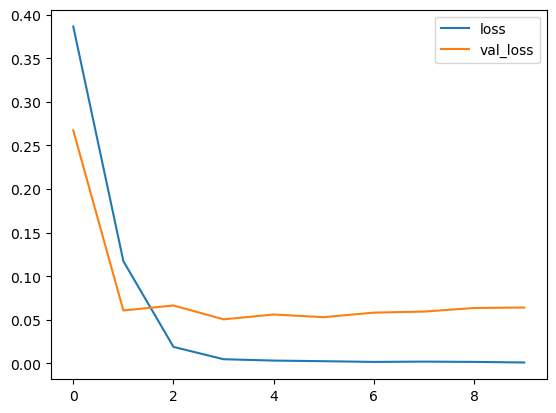

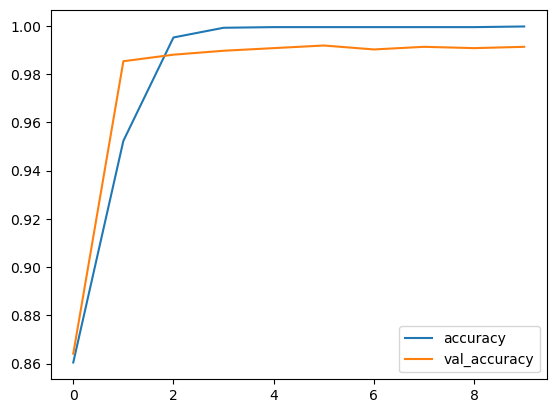

In [21]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


In [22]:
text_labels = ['ham','spam']
text = 'Were thrilled to inform you that youve won $1,000,000 in our latest lottery draw! To claim your prize, simply reply to this email with your personal details within 24 hours. Dont miss this chance to become a millionaire!'
sequences = tokenizer.texts_to_sequences([text])
data = pad_sequences(sequences, maxlen=T)
predict = np.argmax(model.predict(data))
print(text_labels[predict])


ham
